In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

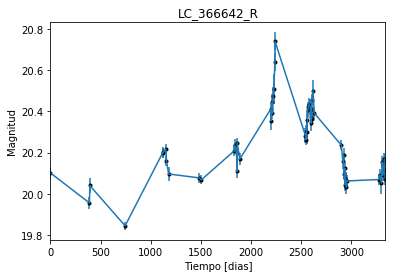

In [3]:
data = np.genfromtxt('LC_366642_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_366642_R')
plt.savefig("LC_366642_R.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

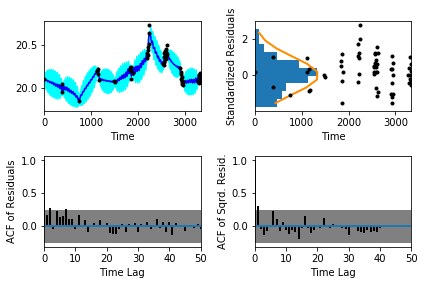

In [6]:
sample.assess_fit()

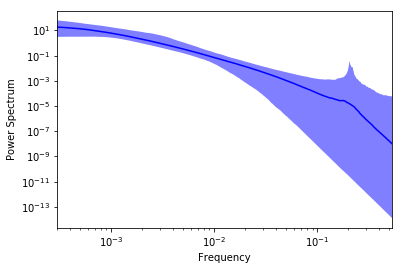

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

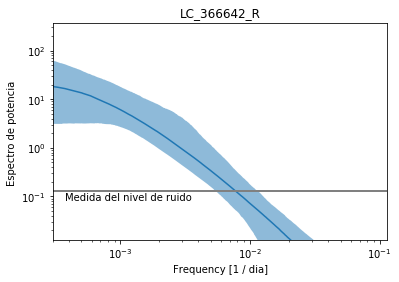

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_366642_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_366642_R')

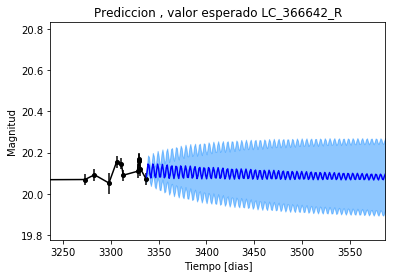

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_366642_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_366642_R')

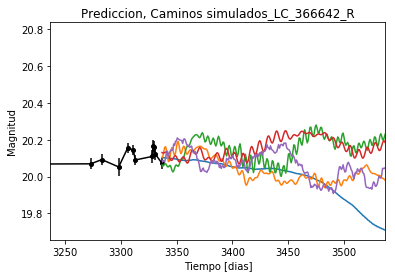

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_366642_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


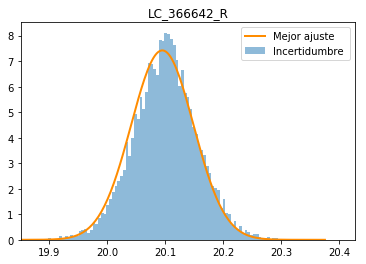

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_366642_R')
plt.savefig("Mejor_ajuste_LC_366642_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_366642_R')

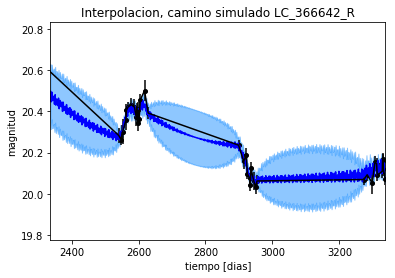

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_R')

Text(0.5,1,'Interpolacion, camino simulado LC_366642_R')

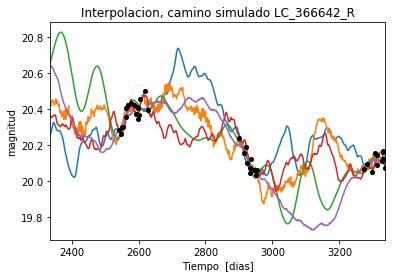

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 394.372024033
Median: 0.0118927451164
Standard deviation: 0.177079973402
68% credibility interval: [ 0.00095813  0.15326326]
95% credibility interval: [  3.77096701e-04   7.01483923e-01]
99% credibility interval: [  3.04569120e-04   9.65339657e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 505.489687128
Median: 0.00665355555662
Standard deviation: 0.10641396684
68% credibility interval: [ 0.00067348  0.05987482]
95% credibility interval: [  3.48280135e-04   3.97020522e-01]
99% credibility interval: [  3.04464959e-04   7.31307667e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 857.92640141
Median: 0.0545365725632
St

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 148.296535742
Median: 106.39387779
Standard deviation: 2.39875040038
68% credibility interval: [ 104.34407669  108.74977702]
95% credibility interval: [ 101.7113458   111.62302056]
99% credibility interval: [  99.67441642  112.20550982]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 519.110516591
Median: 0.890310757566
Standard deviation: 2.35531028085
68% credibility interval: [ 0.14951286  4.35768669]
95% credibility interval: [ 0.04315349  8.10031732]
99% credibility interval: [  0.02215395  11.33512681]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 786.895881734
Median: 2.05219810951
Standard deviation: 11.761533448
68% credibility interval: [  0.39452529  17.16998252]
95% credibility interval: [  1.45652270e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11440.6740713
Median: 1.66659064523e-33
Standard deviation: 1.70157504654e+28
68% credibility interval: [  6.49385256e-72   1.59226479e-08]
95% credibility interval: [  4.07262380e-87   7.21768870e+14]
99% credibility interval: [  1.66873898e-100   2.82522498e+017]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2000.57166088
Median: 20.1483026531
Standard deviation: 0.0904733428406
68% credibility interval: [ 20.06595307  20.22519505]
95% credibility interval: [ 19.96153108  20.32541684]
99% credibility interval: [ 19.8795332   20.41680779]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 433.408361057
Median: 0.205898716721
Standard deviation: 0.275799969751
68% credibility interval: [ 0.          0.58762253]
95% credibility interval: [ 0.          0.95724383]
99% credibility interval: [ 0.          1.03628995]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 433.408361057
Median: 0.205898716721
Standard deviation: 0.275799969751
68% credibility interval: [ 0.          0.58762253]
95% credibility interval: [ 0.          0.95724383]
99% credibility interval: [ 0.          1.03628995]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 723.027232108
Median: 0.0
Standard deviation: 0.000528182264597
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 148.296535742
Median: 106.39387779
Standard deviation: 2.39875040038
68% credibility interval: [ 104.34407669  108.74977702]
95% credibility interval: [ 101.7113458   111.62302056]
99% credibility interval: [  99.67441642  112.20550982]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 896.607030495
Median: 0.0456485083228
Standard deviation: 0.0288550315314
68% credibility interval: [ 0.02982273  0.07019894]
95% credibility interval: [ 0.02036764  0.12359955]
99% credibility interval: [ 0.01690463  0.1877937 ]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 225.483856753
Median: 1.12498030023
Standard deviation: 0.233149061696
68% credibility interval: [ 0.89946013  1.37458411]
95% credibility interval: [ 0.75048712  1.65264734]
99% credibility interval: [ 0.66574353  1.81822288]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 279.364042695
Median: 0.00849005106029
Standard deviation: 0.386608241212
68% credibility interval: [ 0.00028013  0.12354074]
95% credibility interval: [  1.38739718e-16   1.11456421e+00]
99% credibility interval: [  8.31420737e-20   2.93669166e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 394.372024034
Median: (-0.0747243213774-0.521126713188j)
Standard deviation: 2.05934156886
68% credibility interval: [-0.96298145+0.j         -0.00602009-0.14346787j]
95% credibility interval: [ -4.40755348e+00+0.j         -2.36936845e-03-1.4058426j]
99% credibility interval: [ -6.06540795e+00+0.j         -1.91366422e-03-1.3279752j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 505.489687128
Median: (-0.0418055225138+1.80581095962j)
Standard deviation: 1.85741793152
68% credibility interval: [-0.37620459+0.j         -0.00423162+5.02552455j]
95% credibility interval: [ -2.49455351e+00+3.9529116j   -2.18830863e-03+1.38906938j]
99% credibility interval: [ -4.59494159e+00+5.81122004j  -1.91300976e-03+1.27887693j]
Posteri